# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

* The smartcab is not moving (`idling`) during the entire simulation. 
* The idle agent receives positive or negative rewards based on following the traffic rules. When the light is red, the agent gets positive reward as `"not-moving"` is the right action to take. When the light color changes to green and there is no oncoming traffic at the intersection, the agent receives large negative rewards for being idle but when there is oncoming traffic, it gets small positive rewards.  

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

Exploring **`agent.py`** file: 

Table below shows all the flages under each class:

| Environment | Driving Agent | Simulation |
| :-: | :-: | :-: |
| `verbose` | `learning` | `update_delay` | 
| `num_dummies` | `epsilon` | `display` |
| `grid_size` | `alpha` | `log_metrics` |
|  | `enforce_deadline` | `optimized` |
|  |  | `tolerance` |
|  |  | `n_test` |
  
   * The **`num_dummies`** in the Environment class controls traffic in the simulator.
   * Setting **`learning`** to `True` forces the driving agent to use Q-learning.
   * The **`tolerance`** controls how much the agent can explore before beginning testing (the default is 0.05). Once the epsilon gets less than the tolerance, the agent switches from training to testing mode.

Exploring **`environment.py`** file:

* At every time step in the environment class, the `step()` method is called which then calls for `agent.update()` metod. Naturally, update method is different for the primary and dummy agents. The update method calls the `act()` method which checks if the action is legal or a violation has happened (applies penalty). It then returns reward for the taken action.

Exploring **`simulator.py`** file:

* The `render_text()` method is the non-GUI render display of the simulation which prints simulation outputs in the terminal / command prompt. 
* Whereas the `render()` method is the GUI render display of the simulation. It visually presents simulation outputs at the *pygame* GUI interface.

Exploring **`planner.py`** file:

* The `next_waypoint()` method considers the East-West Direction first as `dx` variable is checked first and then the `dy` variable.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


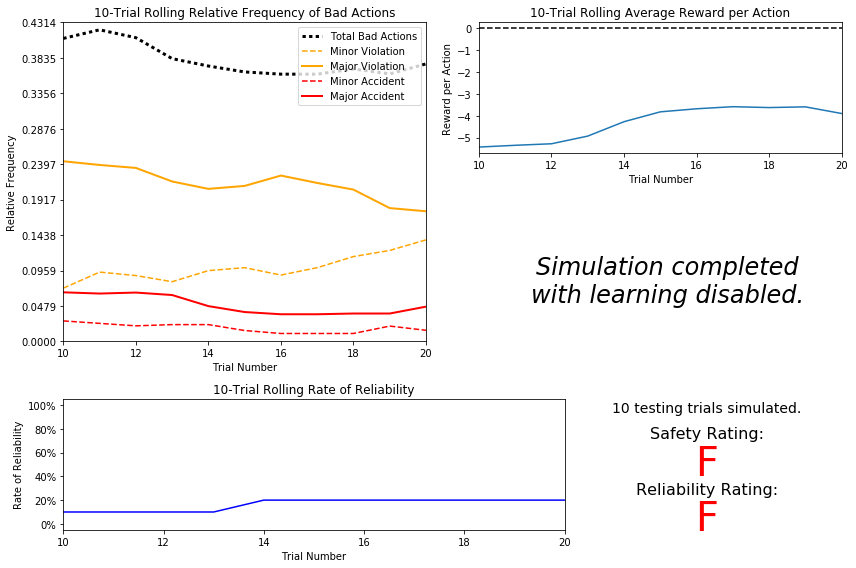

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

These graphs show interesting facts about our initial simulation. 

From the `"Frequency of Bad Actions"` graph, it can be observed that:
* The agent makes bad decisions almost 40% of the time.
* It seems that around 5% of all decisions (and 12.5% of bad decisions) ends to major accidents. This number is almost 3%(and 7.5% of bad decisions) for minor accidents. This means that the chance of a bad decision leading to an accident (major or minor) on average is near 20%.

From the `"Rate of Reliability"` graph, it can be observed that:
* The rate of success is near 20%. This means that smartcab randomly arrives at destination 20% of the time. 

From the `"Reward per Action"` graph, it can be observed that:
* The average reward that the agent receives is near -5. Considering that major accidents (5% frequency) and major violations (20% frequency) have the penalties of -40 and -20 respectively, it can be inferred that agent also receives positive rewards for its correct decisions.

As expected, the outcome of the results does not change significantly as there is no training involved in decision-making process. In other words, the agent doesn't learn from its behavior and at each step, it makes decisions randomly.

Obviously, this cab is not considered neither safe nor reliable for its passengers. We must set our bar high in safety and reliability for our smartcab to be used publicly. By definition, safe means no major accident and no/few minor traffic violations. Our simulation shows that there is 5% chance that our agent's deciosions lead to major accidents. On the other hand, reliability is defined as reaching the destination on time for at least 90% of trips. Our cab reaches to destination around 20% of the time. 


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

It seems that all the features above are relevant, but they are not equally important wrt their impact. Let's first consider the most relevant features on safety and efficieny exclusively, and then make a conclusion on which ones could have a great impact on both.

[Safety] It seems `inputs` features except the `right` feature are enough to ensure safe maneuvers. 
* `light:` this is a critical safety feature as the light color tells the vehicle to move or to stop. Moving when the light is red leads to major accident.
* `oncoming:` this feature is also critical for safety since the cab should avoid intersecting with the oncoming traffic which leads to major accident.
* `left:` this feature only matters if the agent decides to make a right-turn when the light is red. In this case, if there exists a vehicle on the left with the intention to go forward, a major accident will happen.
* `right:` this feature doesn't seems to be very useful as the cab's direction never interfer with the direction of a vehicle to its right.

[Efficiency] It seems `waypoint` and `deadline` are the most relevant features to efficiency by providing the agent with information about the direction and time. 
* `wayoint:` this feature is important as it help agent to find its direction towards the destination.
* `deadline:` it is true that using this feature, agent learns to get to its destination with least amount of time, but one can argue that adding this feature significantly increases the size of state space, which makes learning process very difficult and inefficient. 

Based on what we discussed, I consider 3 out of these 6 features including `waypoint`, `light`, and `oncoming` as the most relevant features to both safety and relibility. I excluded `left` from the game to make the state space even smaller and the learning process more efficient.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

If we consider all 6 features:

| Label | Features | Possible States | Number of States |
| :-: | :-: | :-: | :-: |
| `A` | `waypoint` | `forward, left, right` | `3` |
| `B` | `inputs-light` | `red, green` | `2` |
| `C` | `input-oncoming` | `None, forward, left, right` | `4` |
| `D` | `inputs-left` | `None, forward, left, right` | `4` |
| `E` | `inputs-right` | `None, forward, left, right` | `4` |
| `F` | `deadline` | `(5 time step) * (maximum distance for 6x8 grid = 10)` | `50` |

The possible number of combinations is :  

`A*B*C*D*E*F = 3*2*4*4*4*50 = 19200 `

If we reduce number of features to 4 as discussed above, this number reduces to : 

`A*B*C*D = 3*2*4*4 = 96`

These are possible states based on just features. Considering possible actions (`None, forward, left, right`) to explore this state space, the size of the space increases to `96*4 = 384`. This doesn't seem a very large space for a Q-learning algorithm of this size but it still needs many training trials to get reasonable results which is not very efficient, so I prefer to reduce the number of features even more to 3 by droping `inputs-left`. 
This modification reduces the state space to `A*B*C = 3*2*4 = 24` (features only) and `24*4 = 96` (features and actions) and helps the driving agent to learn a policy for each possible state within a much more reasonable number of training trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

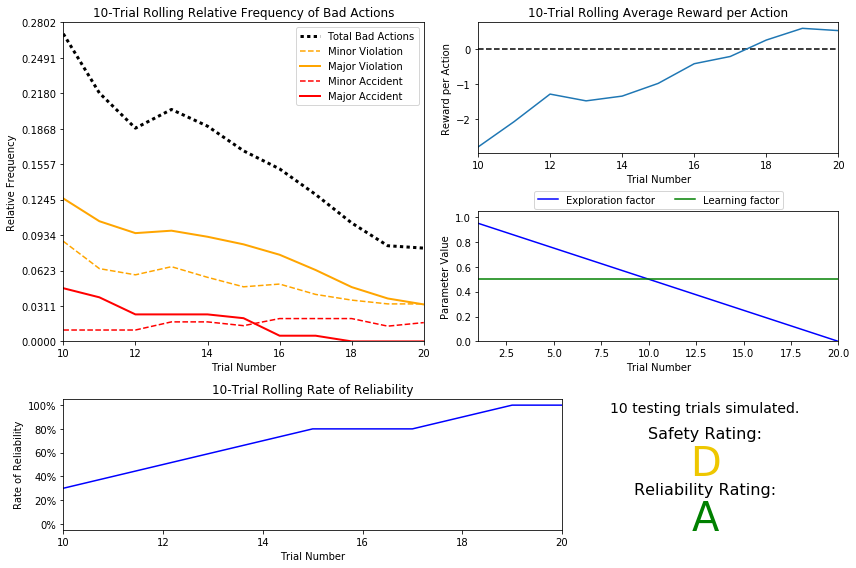

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

From the `"Frequency of Bad Actions"` graph, it can be observed that:
* the rate of making bad decisions has been reduced from almost 40% for the basic driving agent to near 10% time for the default Q-learning agent.

* it seems that as the number of trials increased, the relative frequency of major accidents decreased from near 4% to 0. However, this variable increased slightly for minor accidents. This means that during the course of learning process, the agent learnt to make better decisions and consequently, his decisions led to less sever accidents (less major but more minor accidents).

From the `"Rate of Reliability"` graph, it can be observed that:
* the rate of success jumped up from near 20% for the basic driving agent to more than 90% for the learning agent. This means that learning has significantly improved reliability. 

From the `"Reward per Action"` graph, it can be observed that:
* as the number of trials increased, the average reward also increased from near -3 to around +1. This is a great improvement in comparison with basic driving agent with average reward of -5.

From the `"Exploration factor - Learning factor"` graph, it can be observed that:
* the learning factor (alpha) is constant (0.5).
* the exploration factor (epsilon) decayed linearly with the rate of 0.05 which took 20 trials to get from 1 to 0. It should be noted that the initial epsilon value is 0.95 as `reset` function is called before every trial including the first one.

Obviously, this cab is much safer and more reliable than the basic driving agent. It gets **A** score in reliability and **D** score in safety whereas the basic agent received **F** in both performance measures. However, as discussed earlier, it is still very unsafe and not reliable enough to be used in real world. 


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

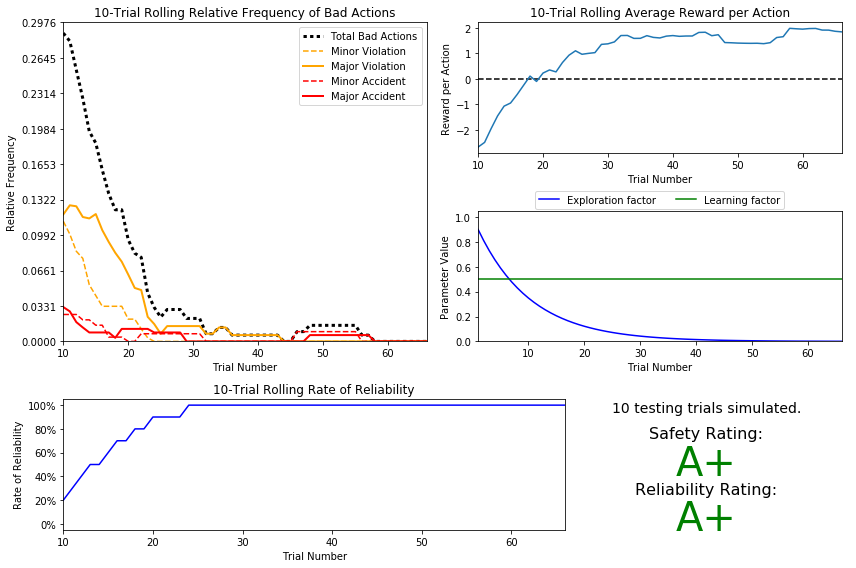

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_10.csv')

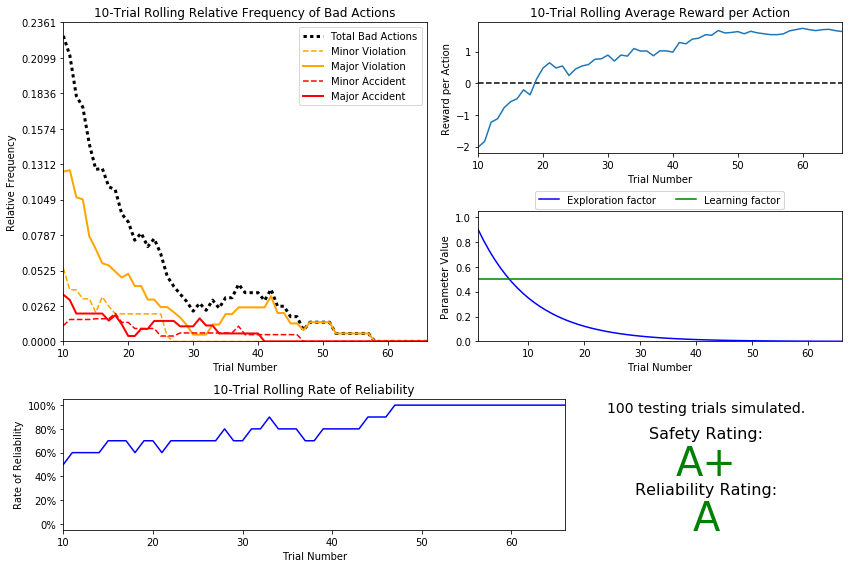

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_100.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

As can be observed in the table below, I made at least 16 attempts playing with decay functions, tolerance, and alpha,  to optimize the Q-Learning agent. I finally ended up with $\epsilon(t) = {c}\epsilon(t-1) \textrm{ for } c = 0.9$  where $c$ being `decay_rate`. 

| Attempt |  Decay Function  | Alpha | Tolerance | n_trials | n_test | Safety | Reliability |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| `1` |  $ \epsilon = e^{-at} $ | `0.5` | `0.01` | `20` | `10` | `D` | `B` |
| `2` |  $ \epsilon = e^{-at} $ | `0.2` | `0.01` | `24` | `10` | `A+` | `F` |
| `3` |  $ \epsilon = e^{-at} $ | `0.2` | `0.001` | `35` | `10` | `A+` | `A` |
| `4` |  $ \epsilon = e^{-at} $ | `0.2` | `0.001` | `35` | `100` | `D` | `F` |
| `5` | $ \epsilon = \frac {1}{t} $ | `0.5` | `0.01` | `100` | `10` | `A+` | `A+` |
| `6` | $ \epsilon = \frac {1}{t} $ | `0.5` | `0.01` | `100` | `100` | `A+` | `C` |
| `7` | $ \epsilon = \frac {1}{t} $ | `0.5` | `0.02` | `51` | `10` | `A+` | `F` |
| `8` | $ \epsilon = \frac {1}{t} $ | `0.3` | `0.02` | `51` | `10` | `A+` | `C` |
| `9` | $ \epsilon = \frac {1}{t} $ | `0.15` | `0.02` | `51` | `10` | `A+` | `A+` |
| `10` | $ \epsilon = \frac {1}{t} $ | `0.15` | `0.02` | `51` | `100` | `A+` | `D` |
| `11` | $ \epsilon = \frac {1}{t^2} $ | `0.5` | `0.001` | `32` | `10` | `A+` | `F` |
| `12` | $ \epsilon = \frac {1}{t^2} $ | `0.5` | `0.0005` | `45` | `10` | `A+` | `A` |
| `13` | $ \epsilon = \frac {1}{t^2} $ | `0.5` | `0.0001` | `101` | `10` | `A+` | `C` |
| `14` | $ \epsilon = {c}\epsilon $, $ c= $ `0.9` | `0.5` | `0.01` | `45` | `10` | `D` | `A+` |
| `15` | $ \epsilon = {c}\epsilon $, $ c= $ `0.9` | `0.5` | `0.001` | `66` | `10` | **`A+`** | **`A+`** |
| **`16`** | $ \epsilon = {c}\epsilon $, $ c= $ `0.9` | **`0.5`** | **`0.001`** | **`66`** | **`100`** | **`A+`** | **`A`** |


As shown in the table above, for `epsilon-tolerance` of `0.001` and constant `alpha` of `0.5`, the agent needed 66 trials before beginning testing which makes sense as `0.9^66 = 0.00095 < 0.001`. 

I picked the epsilon decay functions, tolerance and alpha in a way that allows the learning agent sufficiantly explore the environment and also reinforce its learning. All decay functions above including the chosen exponential function lets the agent to aggressively explore the state space in the beginning and then exploit its learning from the mid to the end of trials. `tolerance` mostly dictates how much time the egent will have to explore the environment. I set this parameter to `0.001` to get a trial number greater than `24` to cover all possible state combinations explained in Question 5, and still have enough time to learn the good actions. I found that it's hard to change two variables at the same time. So, I kept `alpha` at its default value (`0.5`) to have a fair track of previous steps. 

There is no doubt that the optimized Q-learner has a much better performance than the default Q-learner. From the `"Frequency of Bad Actions"` graph, it can be observed that the rate of making bad decisions converged to 0% with no major accident. From the `"Rate of Reliability"` graph, it can be observed that the rate of success slightly improved from near 90% for the default learning agent to 100% for the optimized learning agent. This is reflected in the reliability score which has changed from A to A+. From the `"Reward per Action"` graph, it can be observed that the average reward also increased to around +2 per action. This is a great improvement than before showing that the agent consistently makes good decisions.

To evaluate the Q-learner's performance, I ran the simulation with both 10 and 100 testing trials. I used 10 trials to be consistent with the previous learners. Using 10 testing trials, the optimized lerner achieved A+ score in both reliability and safety. I tested the agent's performance on 100 trials to increase the chance of being exposed to the unseen situations. The Q-learner achieved A+ score in safety suggesting that the agent completely learnt the road traffic rules, and it got A score on reliability meaning that the smartcab reaches its destination at least 90% of the times. As can be seen in the table above, some combination of decay functions and parametrs led to A+ score in both reliability and safety but they failed when they tested on the large number of test cases. 

All in all, I am very satisfied with the performance of this optimized Q-learner as the implementation was efficient and the agent achieved very high safety and reliability scores. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

As discussed earlier, I defined three features in the state space including (`waypoint`, `light`, `oncoming`). The optimal policy can be defined as taking the best action in a given state, which in the case of this problem basically is following the traffic rules. The optimal policy for the smartcab at high level can be summarized as following:

A) when the light is red, stop moving unless you get largely penalized. There is an exception for the case of right-turn rule. A rule that allows for right-turn when the light is red and there is no oncoming traffic from the left side. In this case, the optimal policy is to turn right. 

> Note: since the state space does not include `input-left` feature, my agent doesn't learn the right-turn rule. In other words, Q-learner has no idea about the traveling direction of the vehicle coming from its left side.


B) when the light is green, you should move in the direction of waypoint unless you cross the oncoming traffic, which again you get largely penalized for causing a major accident. 

> Note: based on this policy, the agent learns the left-turn rule. The rule that doesn't allow turning left when the oncoming traffic is going forward or turning right. So, we should expect to see a large penalty in (`left`, `green`, `right`) state for taking the `left` action.

Now, let's check out a few state-action pairs from `sim_improved-learning.txt` file. 

> Note: Scanning the file shows most of the state-action pairs have non-zero values. This suggests that the learner have done enough exploration through the environment to make good decisions.


* In a case where the samrtcab is heading forward and light is red, the correct action corresponding to the optimal policy would be to stay idle. However, the sub-optimal policy is to turn right. But, as I explained above, the Q-learner doesn't learn the right-turn rule and that's why in the following set of state-actions, the optimal policy matches the correct action but the sub-optimal policy doesn't.

    `('forward', 'red', None)`<br>
    ` -- forward : -9.97`<br>
    ` -- None : 1.89`<br>
    ` -- right : -5.22`<br>
    ` -- left : -12.66`<br>


* In a case where the smartcab is heading forward and the light is green, the optimal  policy is to continue going forward. The sub-optimal policy would be to turn right or left.

    `('forward', 'green', 'forward')`<br>
    ` -- forward : 1.74`<br>
    ` -- None : -2.63`<br>
    ` -- right : 0.08`<br>
    ` -- left : 0.10`<br>
    

* In cases where smartcab wants to turn right on red and has no idea of the right-turn rule, it decides to not move.
 
    `('right', 'red', 'forward')`<br>
    ` -- forward : 0.00`<br>
    ` -- None : 1.03`<br>
    ` -- right : 0.00`<br>
    ` -- left : 0.00`<br>
    `----------------------------------`<br>
    `('right', 'red', 'right')`<br>
    ` -- forward : -5.20`<br>
    ` -- None : 0.57`<br>
    ` -- right : 0.00`<br>
    ` -- left : -20.44`<br>
    `----------------------------------`<br>
    `('right', 'red', None)`<br>
    ` -- forward : -7.68`<br>
    ` -- None : 1.10`<br>
    ` -- right : -1.34`<br>
    ` -- left : -11.07`
    

* In a case where smartcab has to turn left and the light is green but the oncoming traffic is turning right, the optimal policy is to go forward. Because collision happens if turns left (large penalty), stopping on green has a large penalty, and if it turns right, it gets far from its destination. So, smartcab effieciently learnt the optimal policy in this case as well. 

    `('left', 'green', 'right')`<br>
    ` -- forward : 1.08`<br>
    ` -- None : -2.76`<br>
    ` -- right : 0.00`<br>
    ` -- left : 0.00`

Let's discuss a few cases where cab did not learn the optimal policy.

* In a case where smartcab wants to turn right, the light is green and there is no conflict with the oncoming traffic, the optimum policy is turning right. However, the agent gives the maximum Q value to the `forward` action. It follows the traffic rules but it is not the optimal decision. In addition, the left-turn receives positive reward which is against traffic rules.

    `('right', 'green', 'forward')`<br>
    ` -- forward : 0.92`<br>
    ` -- None : -3.92`<br>
    ` -- right : 0.20`<br>
    ` -- left : 0.19`
    
    
* Another case is where smartcab is making a right-turn on red but there is colnflict with the oncoming traffic. Not move (`None`) is the optimal policy in this case. But as discussed, the agent didn't learn the right-turn rule and surprisingly decides to turn right.

    `('right', 'red', 'left')`<br>
    ` -- forward : -4.78`<br>
    ` -- None : -0.05`<br>
    ` -- right : 1.49`<br>
    ` -- left : -19.67` 


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

The future rewards wont't work for this project, because:

1. the cab has no idea about its destination. It just makes decision at each intersection based on the next `waypoint`, and its decision at each step doesn't have any influence its decision at the next step. So, it cannot plan ahead of time by learning the best path to its destination, and therefore there is no benefit of linking actions together.

2. the cab destination randomly changes at every trial. This means that a particular position on the grid may not receive good future rewards in consecutive trials.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.